### Industrial Predictive Maintenance System

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- Manufacturing machines operate under varying loads, temperatures, and wear conditions. Unexpected failures lead to:

- Production downtime
- High maintenance cost
- Delay in delivery
- Increased safety risks
👉 Goal:
Build a machine learning model that predicts Machine Failure (0/1) ahead of time so teams can schedule preventive maintenance instead of reacting after breakdowns.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020?resource=download
- The data consists of 14 column and 10000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/ai4i2020.csv')

In [4]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [5]:
# shape of dataset
df.shape

(10000, 14)

### 2.2 Dataset information
 - UID: unique identifier ranging from 1 to 10000
- product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
- type: just the product type L, M or H from column 2
- air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
- process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
- rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise
- torque [Nm]: torque values are normally distributed around 40 Nm with a SD = 10 Nm and no negative values.
- tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.
- a 'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.

#### The machine failure consists of five independent failure modes

- tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 - 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).
- heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the tools rotational speed is below 1380 rpm. This is the case for 115 data points.
- power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.
- overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.
- random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. 

This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.
If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail.

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [6]:
# Column names & datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [7]:
# Summary statistics
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [8]:
# Check Missing values
df.isnull().sum()
# dataset has zero missing values

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [9]:
# Check duplicates
df.duplicated().sum()

np.int64(0)

In [10]:
# Checking the number of unique values of each column
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

In [11]:
# Remove Irrelevant Columns

# UDI and Product ID contain no predictive signal.
df.drop(['UDI','Product ID'],axis=1,inplace=True)

In [12]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [13]:
# Identify Leakage Columns
# These REVEAL the target → must be removed.
df.drop(['TWF','HDF','PWF','OSF','RNF'],axis=1,inplace=True)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


Because they directly describe HOW the machine failed, and the target column ("Machine failure") is simply an OR-combination of them.
so The model will know the answer before predicting.
That means the model is cheating.

It performs unrealistically well in training, but:

❌ Completely fails in real-world deployment

because real machines do not tell you the failure type BEFORE the failure happens.

You only get sensor readings—
not the actual failure category in advance

In [14]:
df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

#### Histogram & KDE

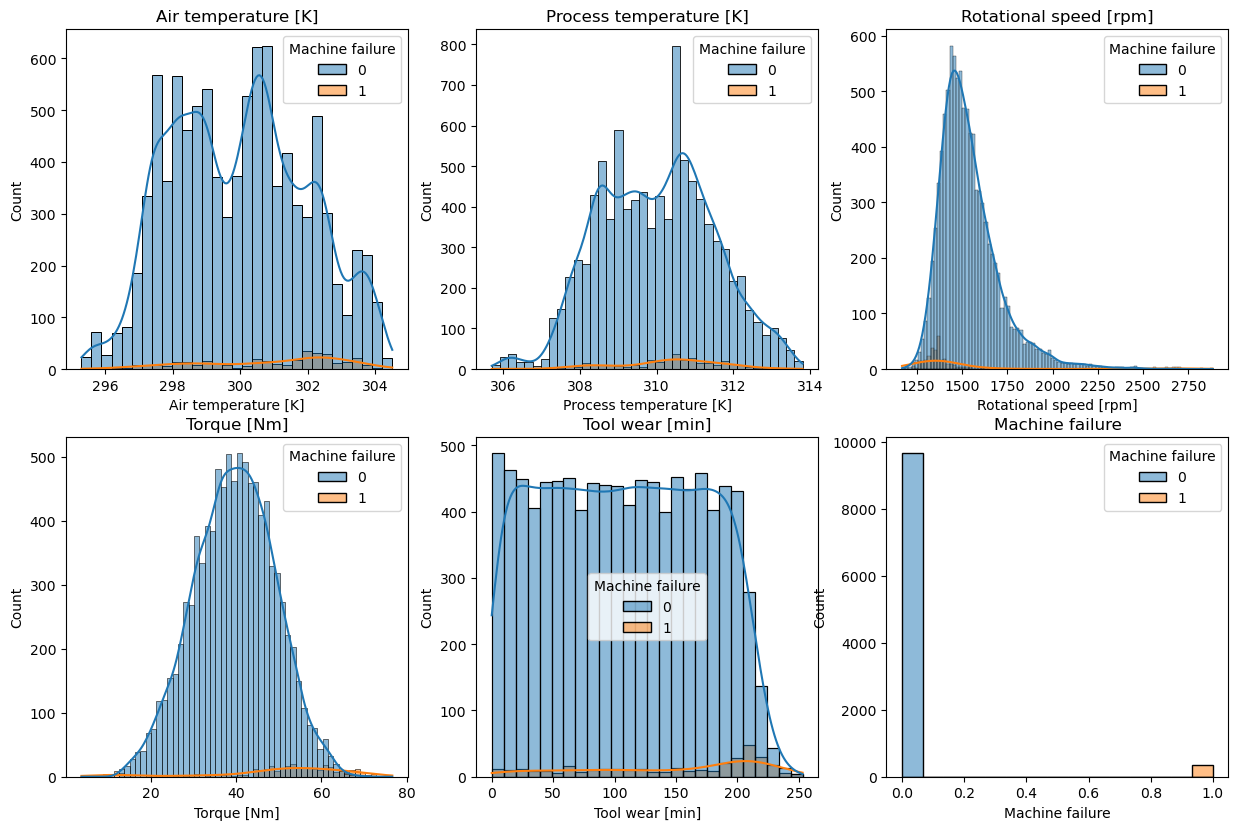

In [15]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 15))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.histplot(data=df, x=col, kde=True, hue='Machine failure',color='green',fill=True)
    plt.title(col)

plt.show()


#### Class Imbalance Check

In [16]:
df['Machine failure'].value_counts()
# data is imbalanced 

Machine failure
0    9661
1     339
Name: count, dtype: int64

Outlier Detection (Boxplots)

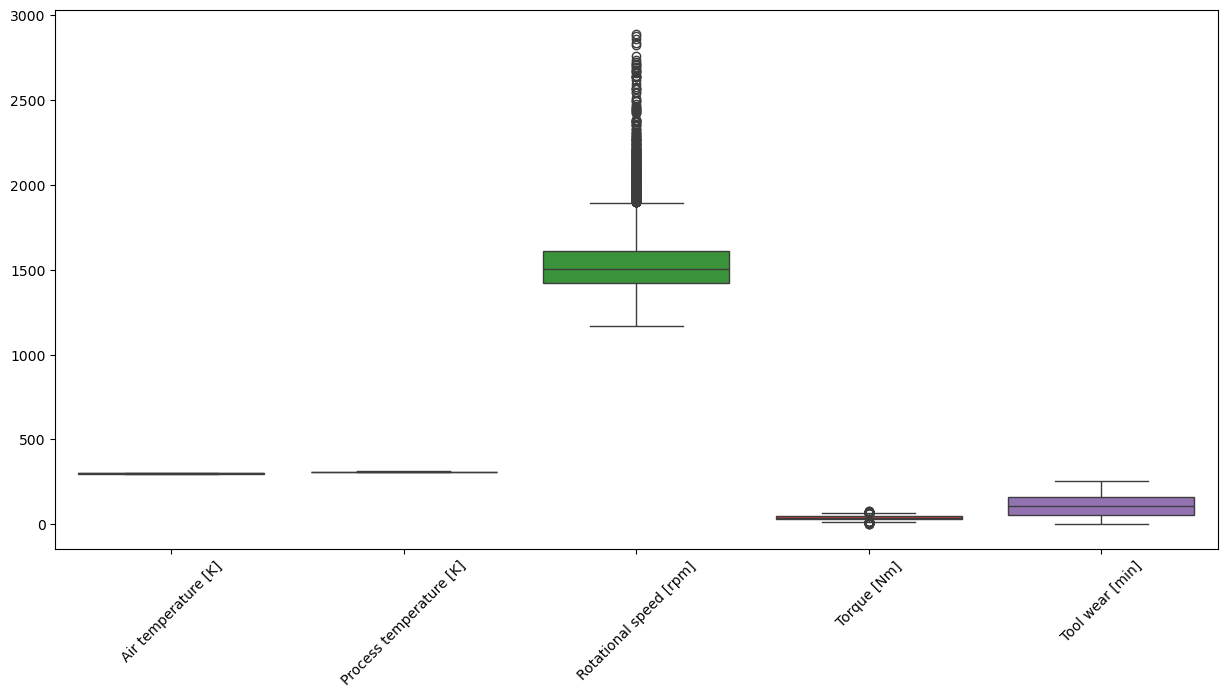

In [17]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df[['Air temperature [K]', 'Process temperature [K]', 
                     'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']])
plt.xticks(rotation=45)
plt.show()


Correlation Analysis

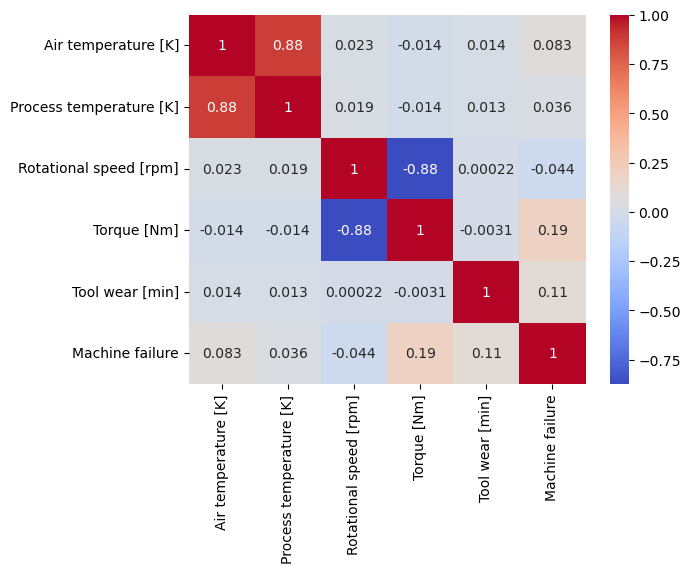

In [18]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm")
plt.show()

observations:

- Torque ↔ Rotational speed strongly correlated
- Temperature difference relates to failure
- Tool wear is a major driver

### FEATURE ENGINEERING

Temperature difference

In [19]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


In [24]:
df['Temp_diff'] = df['Process temperature [K]'] - df['Air temperature [K]']
df['Overheat_Risk'] = (df['Temp_diff'] > 20).astype(int)


In [30]:
df[df['Overheat_Risk']==0]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Temp_diff,Overheat_Risk
0,M,298.1,308.6,1551,42.8,0,0,10.5,0
1,L,298.2,308.7,1408,46.3,3,0,10.5,0
2,L,298.1,308.5,1498,49.4,5,0,10.4,0
3,L,298.2,308.6,1433,39.5,7,0,10.4,0
4,L,298.2,308.7,1408,40.0,9,0,10.5,0
...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,9.6,0
9996,H,298.9,308.4,1632,31.8,17,0,9.5,0
9997,M,299.0,308.6,1645,33.4,22,0,9.6,0
9998,H,299.0,308.7,1408,48.5,25,0,9.7,0


<Figure size 600x400 with 0 Axes>

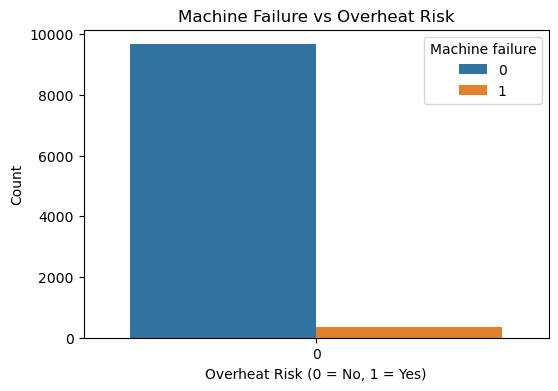

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Overheat_Risk', hue='Machine failure', data=df)

plt.xlabel("Overheat Risk (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Machine Failure vs Overheat Risk")
plt.show()


Mechanical Power Output

In [32]:
df['Power'] = df['Torque [Nm]'] * df['Rotational speed [rpm]']
df['High_Load'] = (df['Torque [Nm]'] > df['Torque [Nm]'].quantile(0.75)).astype(int)


Why use 75th percentile?

No fixed torque threshold exists

Percentiles adapt to real operating conditions

Top 25% torque = heavy load

📌 This captures relative overload, not absolute numbers.

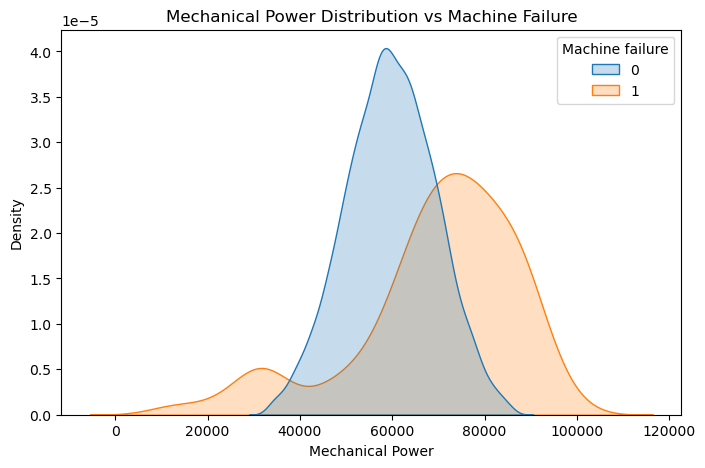

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.kdeplot(
    data=df,
    x='Power',
    hue='Machine failure',
    fill=True,
    common_norm=False
)

plt.title("Mechanical Power Distribution vs Machine Failure")
plt.xlabel("Mechanical Power")
plt.ylabel("Density")
plt.show()


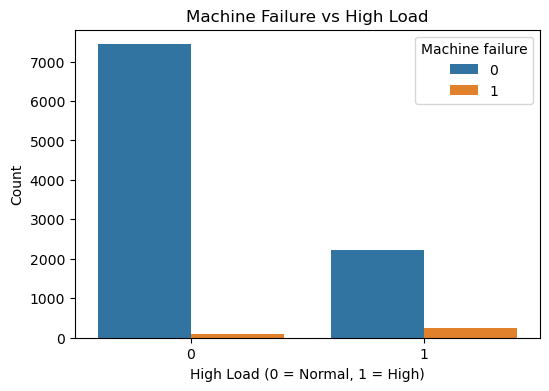

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x='High_Load', hue='Machine failure', data=df)

plt.xlabel("High Load (0 = Normal, 1 = High)")
plt.ylabel("Count")
plt.title("Machine Failure vs High Load")
plt.show()


ool Wear Features
🔹 Tool Wear Percentage

Assuming wear max = 240 min (from dataset)

In [36]:
df['Tool_Wear_Ratio'] = df['Tool wear [min]'] / 240


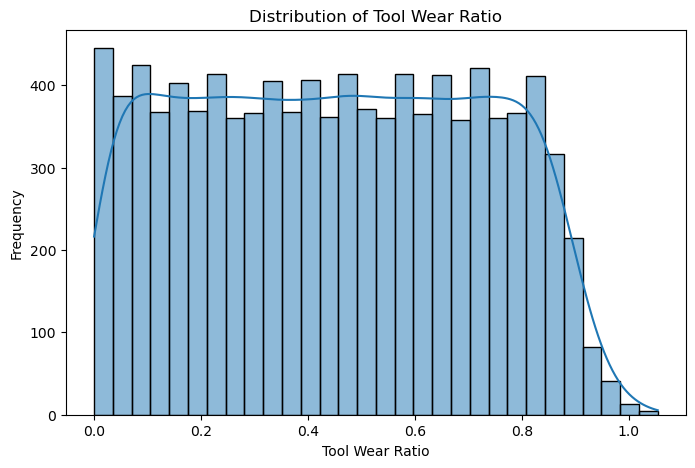

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['Tool_Wear_Ratio'], bins=30, kde=True)

plt.xlabel("Tool Wear Ratio")
plt.ylabel("Frequency")
plt.title("Distribution of Tool Wear Ratio")
plt.show()


In [38]:
df['Tool_Expiry_Risk'] = (df['Tool_Wear_Ratio'] > 0.8).astype(int)


Combined Stress Index

A synthetic feature blending mechanical & thermal stress + wear.


In [39]:

df['Mechanical_Stress_Index'] = (
    (df['Torque [Nm]'] / df['Torque [Nm]'].max())*0.4 +
    (df['Temp_diff'] / df['Temp_diff'].max())*0.3 +
    df['Tool_Wear_Ratio']*0.3
)

4️⃣ What does the index represent?

Mechanical_Stress_Index ∈ [0, 1]

Value	Interpretation
0.0–0.3	Safe operation
0.3–0.6	Moderate stress
0.6–0.8	High stress
> 0.8	Failure imminent

In [41]:
df.head()



,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Temp_diff,Overheat_Risk,Power,High_Load,Tool_Wear_Ratio,Tool_Expiry_Risk,Mechanical_Stress_Index
0,M,298.1,308.6,1551,42.8,0,0,10.5,0,66382.8,0,0.000000,0,0.483829
1,L,298.2,308.7,1408,46.3,3,0,10.5,0,65190.4,0,0.012500,0,0.505856
2,L,298.1,308.5,1498,49.4,5,0,10.4,0,74001.2,1,0.020833,0,0.522065
3,L,298.2,308.6,1433,39.5,7,0,10.4,0,56603.5,0,0.029167,0,0.472868
4,L,298.2,308.7,1408,40.0,9,0,10.5,0,56320.0,0,0.037500,0,0.480458
